### Exercise Tutorial Week 4
# Getting some hands-on experience with supervised machine learning

## Question 1. 
In this tutorial you will work with supervised machine learning. We will classify tweets into four categories namely: normal, abusive, hateful, and spam.

As you noted when reading the literature assigned for this week, there are a few steps that we need to take before we can use supervised machine learning. Namely:
* Collect data (in CS often texts, e.g., tweets)
* Develop a codebook and hand-code the data


In this tutorial, we focus on the actual machine learning part of the process. Hence, we will use a database that already has been coded by humans. It contains tweets and each tweet has a label indicating to which of four categories it belongs, namely normal, abusive, hateful, or spam. Hence, we skip the first two steps of the process described above.

Download the data for this exercise named "hatespeech_text_label_vote_RESTRICTED_100K.csv". 
These datafiles were retrieved from: https://www.dropbox.com/sh/4mapojr85a6sc76/AABYMkjLVG-HhueAgd0qM9kwa?dl=0![image-2.png](attachment:image-2.png)

Using the examples from this week's lecture, can you write a script that opens each file and:
* Creates one list with the tweets
* Creates one list with the labels of the tweets


What could you do to check that this process went well? Can you explore the data a bit (i.e., by checking how often each label is present in the different datasets)?

True


<BarContainer object of 4 artists>

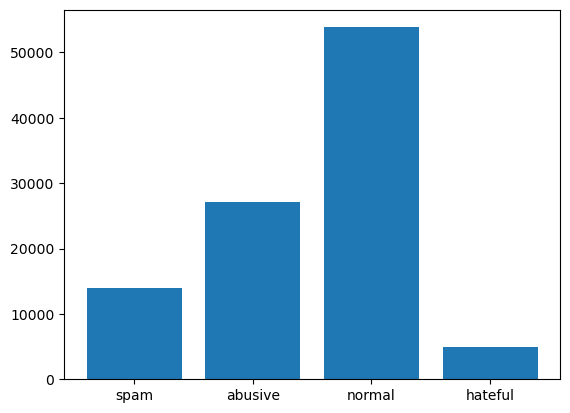

In [1]:
### Model answer

import csv
from collections import Counter
import matplotlib.pyplot as plt


file = "hatespeech_text_label_vote_RESTRICTED_100K.csv"
tweets = []
labels = []

with open(file) as fi:
    data = csv.reader(fi, delimiter='\t')
    for row in data:
        tweets.append(row[0])
        labels.append(row[1])

print(len(tweets) == len(labels)) # there should be just as many tweets as there are labels

Counter(labels)
plt.bar(Counter(labels).keys(), Counter(labels).values())

## Question 2.
Now that we read in the data, we will proceed to the next step: Splitting our data into a training set and a test set. Luckily, scikit learn has a function that can do so for us! Run the code presented in the next blok to split up the dataset.
        
* What do these lines of code do?
* Do you know what the random_state part refers to? Why is this useful?


In [2]:
from sklearn.model_selection import train_test_split

tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

### Model answer

This function splits the dataset into a train set (80% of the data) and a test set (20% of the data).
The random_state function can be used to keep the same results the next time you run a function. 
This can be useful if you want to reproduce your results!

## Question 3.
On to the next step: Transforming the text into numbers, or setting up a vectorizer. Can you create some code that uses a count vectorizer on the texts that you read in? Hint: check out the example provided in the slides of this week! Doing so, you will see that the stopwords are defined (as a built-in stop word list). Why is that done? 

In [3]:
### Model answer

from sklearn.feature_extraction.text import (CountVectorizer)

countvectorizer = CountVectorizer(stop_words="english")
X_train = countvectorizer.fit_transform(tweets_train)
X_test = countvectorizer.transform(tweets_test)

# Stopwords are defined so that stopwords can be identified and excluded.

## Question 4.
Now, let’s train a classifier and run it on the test data! Can you use the examples this week's lecture to train a Naïve Bayes classifer with our count vectorizer?

In [4]:
### Model answer

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

## Question 5.
When you run the code you created for the previous question, you will see that it prints no output. How do you know if your code worked? Run the code presented in the next block (depending on how you named your labels, you may need to adjust the arguments).


Check out the documentation of the scikit learn package: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

What is do the numbers in the output mean? What can you do with it?
We will discuss this (and more) in next week's lecture! 

In [5]:
from sklearn.metrics import classification_report

print(y_pred[:10])
print(classification_report(y_test, y_pred))

['normal' 'normal' 'normal' 'normal' 'spam' 'normal' 'normal' 'normal'
 'abusive' 'normal']
              precision    recall  f1-score   support

     abusive       0.81      0.88      0.85      5369
     hateful       0.83      0.05      0.10       966
      normal       0.78      0.93      0.85     10848
        spam       0.67      0.30      0.41      2817

    accuracy                           0.78     20000
   macro avg       0.77      0.54      0.55     20000
weighted avg       0.78      0.78      0.75     20000



### About this exercise:
This exercise is based on the materials developed and the texts written by Wouter van Atteveldt, Damian Trilling and Carlos Arcila Calderon as reported in their book 'Computational Analysis of Communication' (2022, Wiley-Blackwell).